In [1]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import collections

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from sklearn.cluster import KMeans
from tensorflow.keras.applications import ResNet50

# ResNet50 pré-treinado
model = ResNet50(weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 2s 0us/step


In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Diretório contendo as imagens

# link para a pasta compartilhada com as imagens - https://drive.google.com/drive/folders/16GSnddudO-hh2-Gqp2RIBKCJa5j6Wv2Q?usp=sharing
data_dir = '/content/drive/MyDrive/PESSOAL/#_ACADÊMICO/#_PROJETO/Redes profundas (Deep Learning)/dev/dataset/mix'

# Lista de caminhos para todas as imagens
img_paths = [os.path.join(data_dir, img) for img in os.listdir(data_dir)]

Mounted at /content/drive


In [4]:
# pré processamento das imagens
def img_process(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.resnet50.preprocess_input(img_array)

1/1 [==============================] - 0s 165ms/step


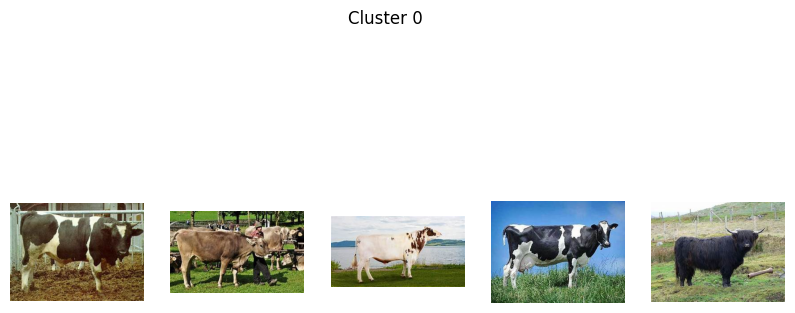

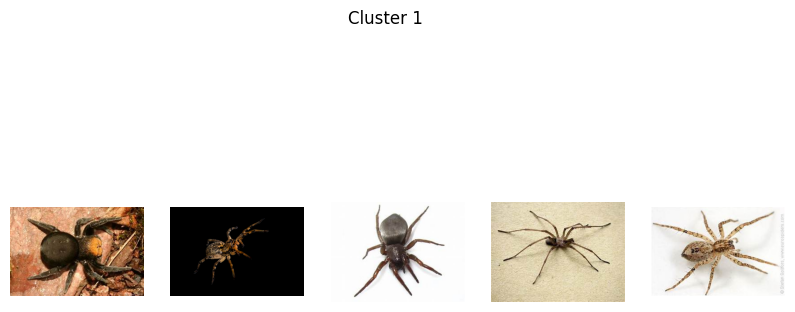

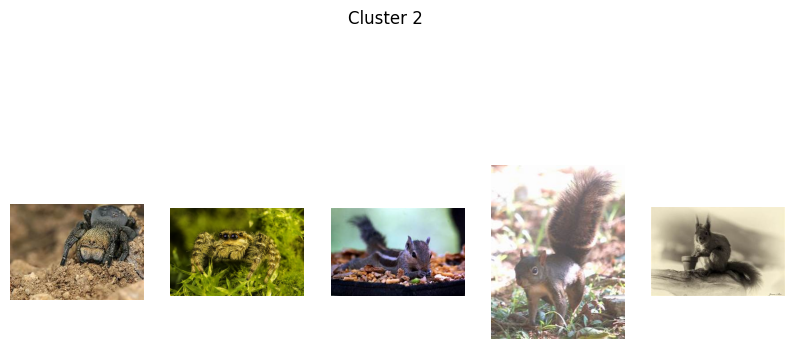

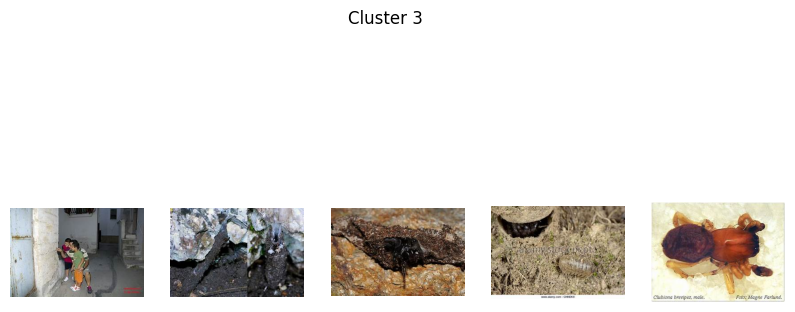

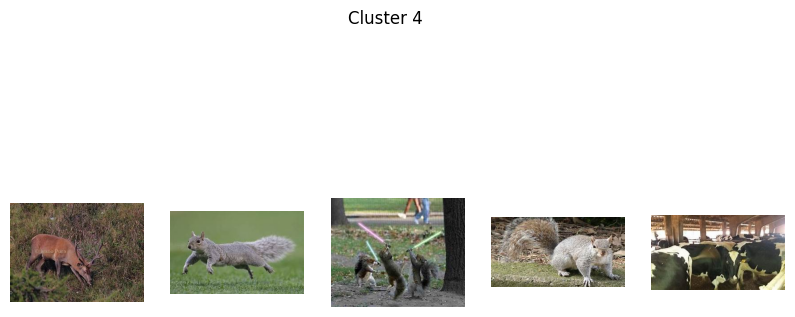

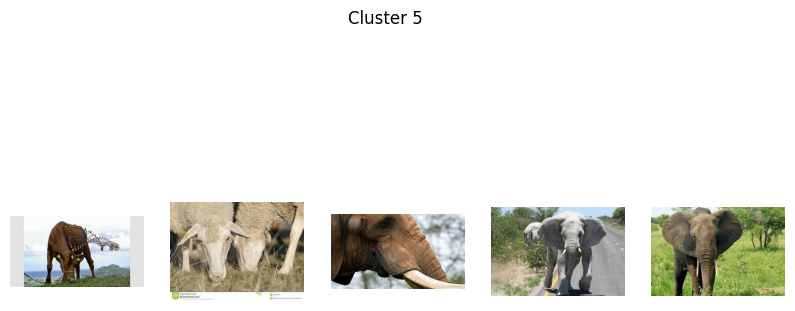

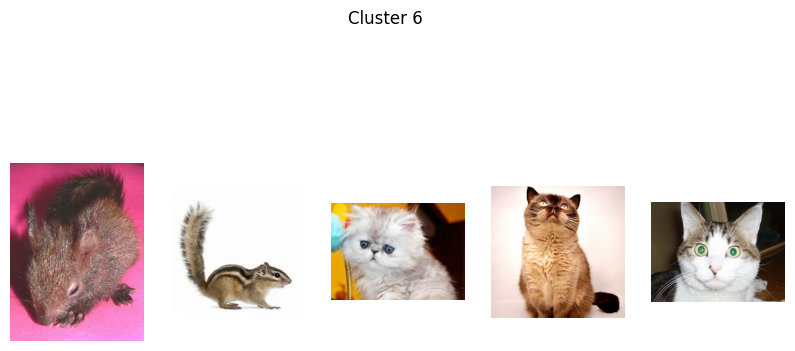

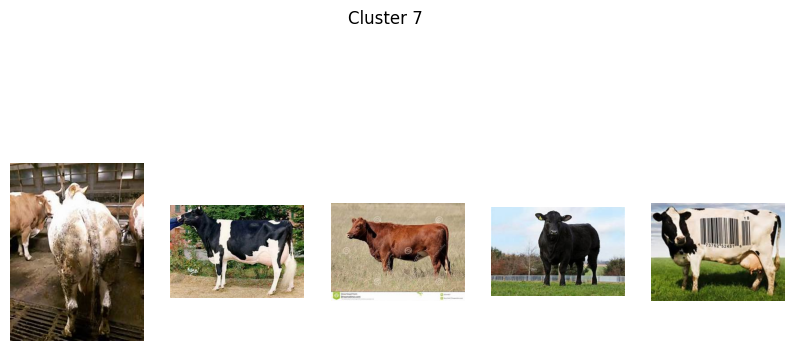

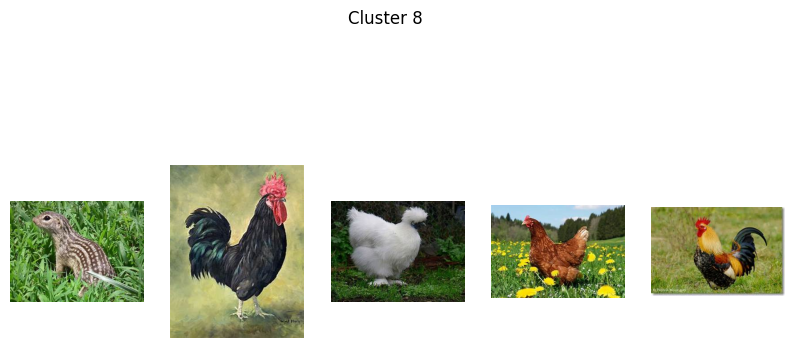

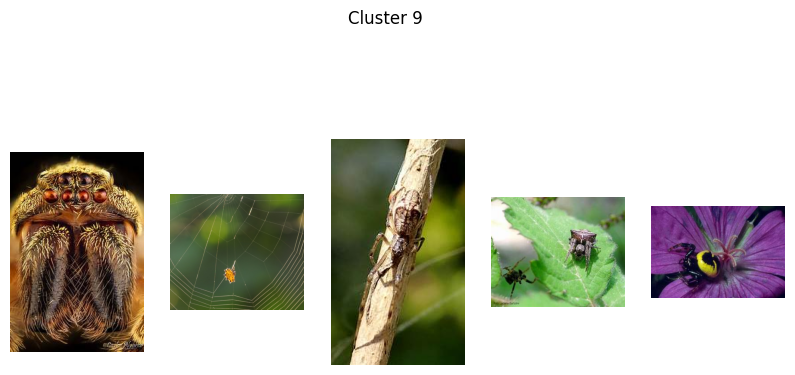

Avaliação dos clusters: Silhueta média = 0.012185840867459774


In [5]:
# Extrair características para cada imagem
features = []
for img_path in img_paths:
    preprocessed_img = img_process(img_path)
    features.append(model.predict(preprocessed_img).flatten())

# Convertendo as características obtidas em matriz
X = np.array(features)

# Algoritmo K-means
kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
kmeans.fit(X)

# Mostrar as imagens dos 10 clusters
for i in range(10):
    cluster_imgs = np.array(img_paths)[np.where(kmeans.labels_ == i)]
    if len(cluster_imgs) >= 5:
        plt.figure(figsize=(10, 5))
        for j in range(min(5, len(cluster_imgs))):
            plt.subplot(1, 5, j+1)
            img = image.load_img(cluster_imgs[j])
            plt.imshow(img)
            plt.axis('off')
        plt.suptitle(f'Cluster {i}')
        plt.show()

# Avaliação de cada cluster obtido
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f'Avaliação dos clusters: Silhueta média = {silhouette_avg}')

In [9]:
X.shape

(4989, 100352)

In [13]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                       